## Name: Anne Sai Venkata Naga Saketh; USC ID: 3725520208; Github Username: sakethanne; USC Email: annes@usc.edu

## DSCI 552 - Assignment 1

In [1]:
#all the import statements that shall be required during this assignment are mentioned here in this cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Specify the file path and delimiter used in your .dat file
file_path = '../data/vertebral_column_data/column_2C.dat'
delimiter = ' '  # Example: Tab (\t) delimiter, adjust as needed

# Specify the column names in a list
column_names = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class']  # Replace with your actual column names

# Use read_csv to read the .dat file with column names
df = pd.read_csv(file_path, delimiter=delimiter, names=column_names)

# Now, 'df' contains the data from the .dat file with specified column names
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


In [3]:
#filtering the data for Normal and Abnormal Classes
#df1 is the data frame for class 1 (Abnormal) and df0 is the data frame for class 0 (Normal)
filtered_data = ((df['class']) == 'AB')
#converting the above filtered_data into a new data frame
df1 = df[filtered_data]
#df1 is the data frame that contains the data for the Abnormal class
df1

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
205,80.11,33.94,85.10,46.17,125.59,100.29,AB
206,95.48,46.55,59.00,48.93,96.68,77.28,AB
207,74.09,18.82,76.03,55.27,128.41,73.39,AB
208,87.68,20.37,93.82,67.31,120.94,76.73,AB


In [4]:
#df1 is the data frame for class 1 (Abnormal) and df0 is the data frame for class 0 (Normal)
filtered_data = ((df['class']) == 'NO')
#converting the above filtered_data into a new data frame
df0 = df[filtered_data]
#df0 is the data frame that contains the data for the Normal class
df0

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
210,38.51,16.96,35.11,21.54,127.63,7.99,NO
211,54.92,18.97,51.60,35.95,125.85,2.00,NO
212,44.36,8.95,46.90,35.42,129.22,4.99,NO
213,48.32,17.45,48.00,30.87,128.98,-0.91,NO
214,45.70,10.66,42.58,35.04,130.18,-3.39,NO
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


# Solving for 1.(b).(i)
### Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1


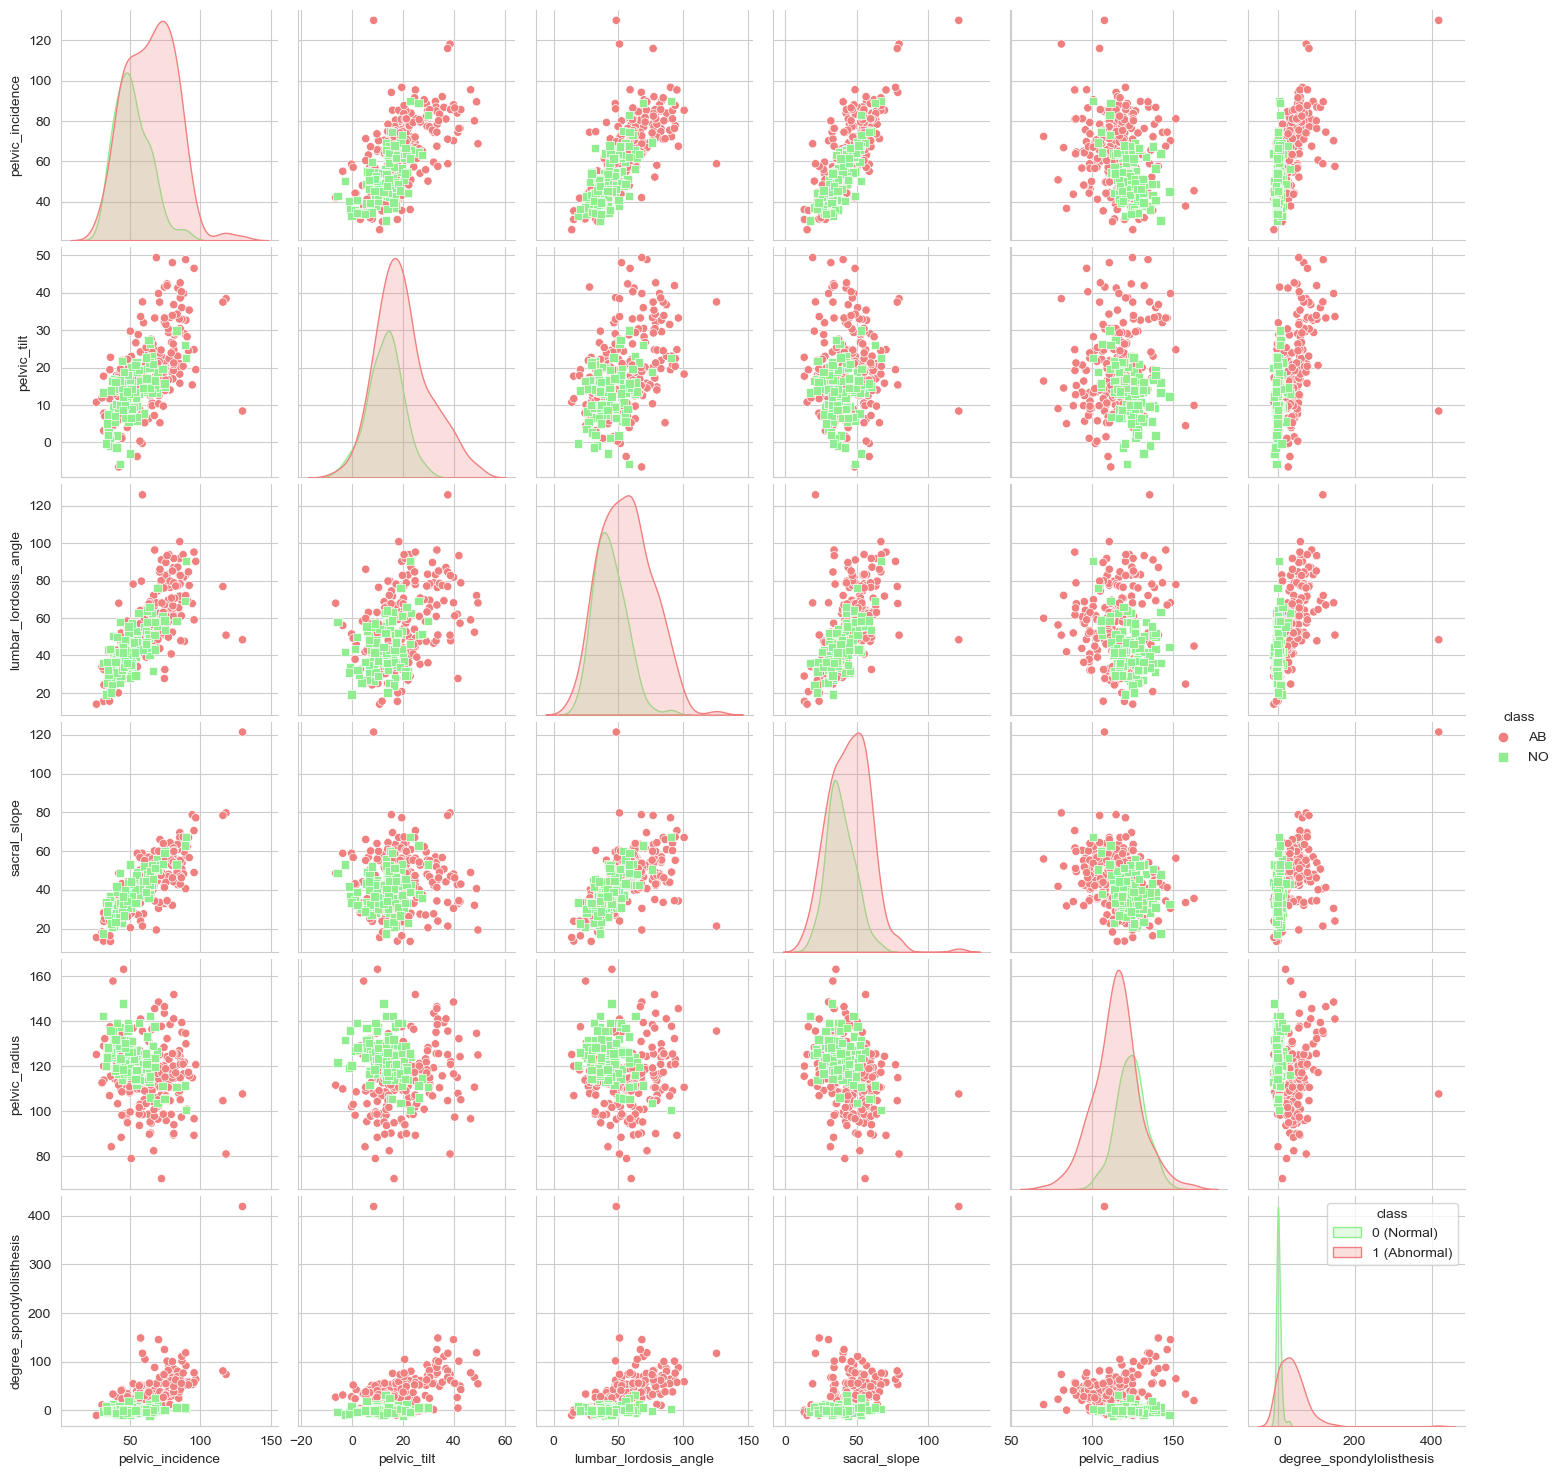

In [5]:
# Set the style for the plots (optional)
sns.set_style("whitegrid")

# Create scatterplots for each independent variable against each other
sns.pairplot(data=df, hue='class', markers=["o", "s"], palette={"NO": "lightgreen", "AB": "lightcoral"})

# Add a legend
plt.legend(title='class', labels=['0 (Normal)', '1 (Abnormal)'])

# Show the plot
plt.show()

# Solving for 1.(b).(ii)
### Make boxplots for each of the independent variables. Use color to show Classes 0 and 1

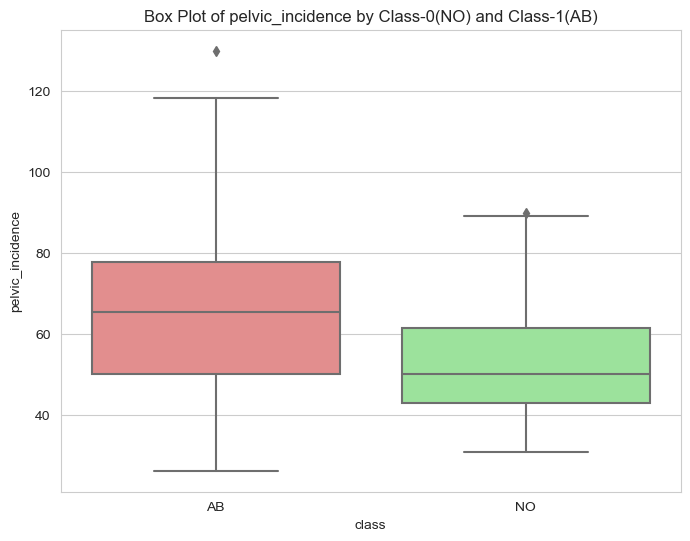

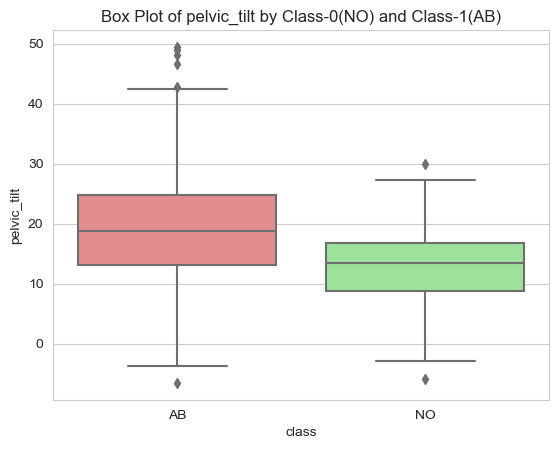

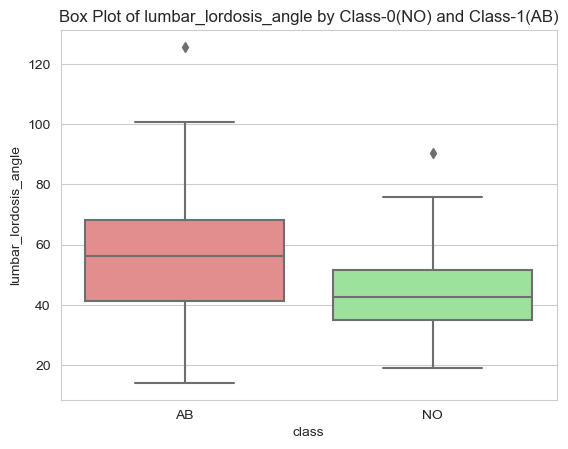

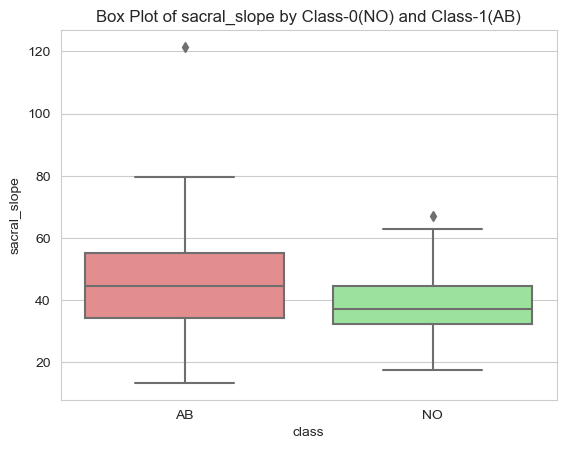

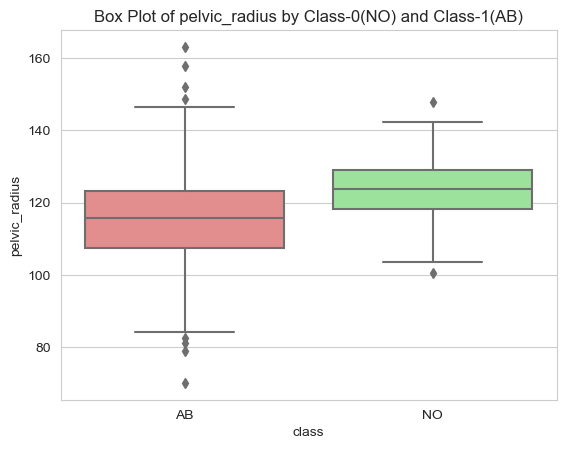

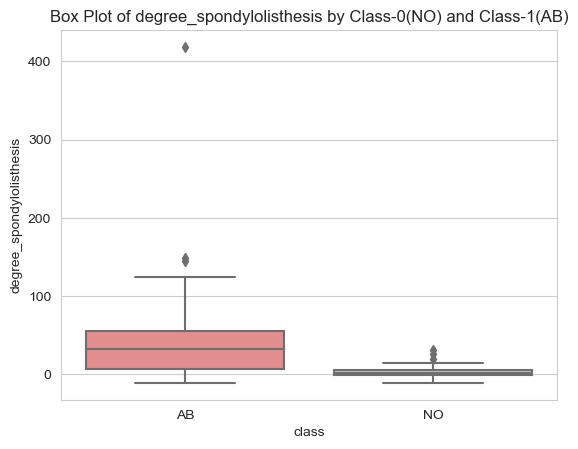

In [6]:
# Create boxplots for each independent variable, so we need to get the list of independent variables from the data set that is given (from the data frame)
independent_variables = df.columns[:-1]  # Exclude the 'Class' column
#defining the plot figure size
plt.figure(figsize=(8, 6))


# Loop through each independent variable
for var in independent_variables:
    # Create a box plot using seaborn
    #for each variable in the data_frame, filter the data for the box plot
    ax = sns.boxplot(x='class', y=var, data=df, palette={"NO": "lightgreen", "AB": "lightcoral"})
    
    #define the title for the box plot
    ax.set_title(f'Box Plot of {var} by Class-0(NO) and Class-1(AB)')
    #define the labels for the box plot
    ax.set_xlabel('class')
    ax.set_ylabel(var) 
    #display the box plot
    plt.show()

# Solving for 1.(b).(iii)
### Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [7]:
# Select the first 70 rows of Class 0 (Normal class) as training data
train_class_0 = df0[:70]

# Select the first 140 rows of Class 1 (Abnormal class) as training data
train_class_1 = df1[:140]

# Concatenate the training data 0 and 1 to create the final training set
train_data = pd.concat([train_class_0, train_class_1])

# Select the remaining rows as test data
test_data = pd.concat([df0[70:], df1[140:]])

# Verify the shapes of the training and test sets ( there are a total of 310 columns in the original data)
print("Training set shape:", train_data.shape)
print("Test set shape:", test_data.shape)

Training set shape: (210, 7)
Test set shape: (100, 7)


# Solving 1.(c).(i)
### Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [8]:
# Encode the 'class' column that contains the 'Normal' and 'Abnormal' strings to numerical values
label_encoder = LabelEncoder()
train_data['class'] = label_encoder.fit_transform(train_data['class'])
test_data['class'] = label_encoder.fit_transform(test_data['class'])
class_mapping = {1: 'AB', 0: 'NO'}
train_data['class'] = train_data['class'].map(class_mapping)
test_data['class'] = test_data['class'].map(class_mapping)
train_data['class'] = label_encoder.fit_transform(train_data['class'])
test_data['class'] = label_encoder.fit_transform(test_data['class'])
print(train_data)

     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
210             38.51        16.96                  35.11         21.54   
211             54.92        18.97                  51.60         35.95   
212             44.36         8.95                  46.90         35.42   
213             48.32        17.45                  48.00         30.87   
214             45.70        10.66                  42.58         35.04   
..                ...          ...                    ...           ...   
135             77.12        30.35                  77.48         46.77   
136             88.02        39.84                  81.77         48.18   
137             83.40        34.31                  78.42         49.09   
138             72.05        24.70                  79.87         47.35   
139             85.10        21.07                  91.73         64.03   

     pelvic_radius  degree_spondylolisthesis  class  
210         127.63                      7.99 

In [9]:
# Split the training and the test data that we already have from the previous step into features and the target
#features contain all the six biomedical attributes, and target contains the encoded class value
train_data_features = train_data.drop('class', axis = 1)
train_data_target = train_data['class']
#repeat the above steps for test_data data frame as well
test_data_features = test_data.drop('class', axis = 1)
test_data_target = test_data['class']

#Print the size of the test and train data to make sure that the data_frames are of the correct size
print("Training set features shape:", train_data_features.shape)
print("Training set target shape:", train_data_target.shape)
print("Testing set features shape:", test_data_features.shape)
print("Testing set target shape:", test_data_target.shape)

# Initialize the KNN classifier with k=7 (you can change the value of k)
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')

# Fit the model to the training data
knn.fit(train_data_features, train_data_target)

# Predict the classes on the test data
y_pred = knn.predict(test_data_features.values)

#y_pred = label_encoder.inverse_transform(test_data_target)

# Evaluate the model
accuracy = accuracy_score(test_data_target, y_pred)
conf_matrix = confusion_matrix(test_data_target, y_pred)
classification_rep = classification_report(test_data_target, y_pred)

# Print the results
print(f"\nAccuracy: {accuracy:.2f}")
print(f"\nError Rate: {1-accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

#check accuracy of our model on the test data
train_error = 1-knn.score(train_data_features, train_data_target)
print("\nTraining Error:",train_error)

Training set features shape: (210, 6)
Training set target shape: (210,)
Testing set features shape: (100, 6)
Testing set target shape: (100,)

Accuracy: 0.88

Error Rate: 0.12

Confusion Matrix:
[[18 12]
 [ 0 70]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        30
           1       0.85      1.00      0.92        70

    accuracy                           0.88       100
   macro avg       0.93      0.80      0.84       100
weighted avg       0.90      0.88      0.87       100


Training Error: 0.1428571428571429


# Solving 1.(c).(ii)
### Test all the data in the test database with k nearest neighbors. Take de- cisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Cal- culate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗

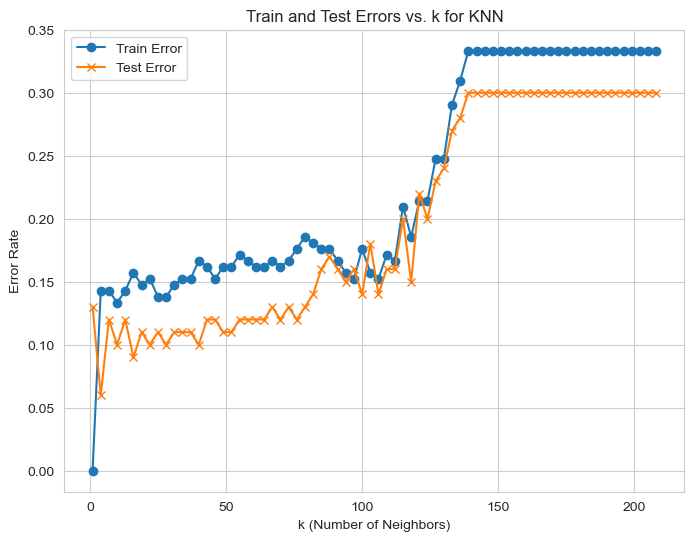


Best k: 4

Best Accuracy: 0.94

Best Error Rate: 0.06

Confusion Matrix:
[[25  5]
 [ 1 69]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100


Training Error: 0.1428571428571429

True Positive Rate (TPR): 0.9857142857142858

True Negative Rate (TNR): 0.8333333333333334

Precision: 0.9324324324324325

F1 Score: 0.9583333333333333


In [10]:
#we have already split the training and the testing data into features and targets in the previous quiestion, so we shall use the same variables for solving this question as well.
# Define a range of k values starting from 208 and going all the way to 1 with a difference of 3
list_k = list(range(208, 0, -3))  # Start from 208 and go down to 1
#checking if it is as per the question
#print("List of K values are:",list_k)

# Initialize lists to store train and test errors to plot the graph with the errors, and the best suitable k value
train_errors = []
test_errors = []

# Initialize variables to store the best k and corresponding metrics
best_k = None
best_accuracy = 0
best_confusion_matrix = None

# Loop through different k values
for k in list_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the model to the training data
    knn.fit(train_data_features, train_data_target)

    # Predict the classes on the test data
    model_pred = knn.predict(test_data_features.values)
    
    # Calculate accuracy and error rates
    accuracy = accuracy_score(test_data_target, model_pred)
    error = 1 - accuracy
    
    # Append to error lists
    train_errors.append(1 - knn.score(train_data_features.values, train_data_target))
    test_errors.append(error)
    
    # Update best k and metrics if needed
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy
        best_confusion_matrix = confusion_matrix(test_data_target, model_pred)
        
# Plot train and test errors
plt.figure(figsize=(8, 6))
plt.plot(list_k, train_errors, label='Train Error', marker='o')
plt.plot(list_k, test_errors, label='Test Error', marker='x')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Error Rate')
plt.title('Train and Test Errors vs. k for KNN')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model with the best k
knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn.fit(train_data_features, train_data_target)
model_pred_best = knn.predict(test_data_features.values)

# Calculate metrics when k = best_k
conf_matrix_best = confusion_matrix(test_data_target, model_pred_best)
classification_rep_best = classification_report(test_data_target, model_pred_best)

print(f"\nBest k: {best_k}")
print(f"\nBest Accuracy: {best_accuracy:.2f}")
print(f"\nBest Error Rate: {1-best_accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_best)
print("\nClassification Report:")
print(classification_rep_best)

#check accuracy of our model on the test data
train_error = 1-knn.score(train_data_features, train_data_target)
print("\nTraining Error:",train_error)

# Extract TP, FP, FN, TN from the confusion matrix
TP = conf_matrix_best[1, 1]
FP = conf_matrix_best[0, 1]
FN = conf_matrix_best[1, 0]
TN = conf_matrix_best[0, 0]

# Calculate TPR (Sensitivity or Recall)
TPR = TP / (TP + FN)

# Calculate TNR (Specificity)
TNR = TN / (TN + FP)

# Calculate Precision
Precision = TP / (TP + FP)

# Calculate F1 Score
F1_Score = 2 * (Precision * TPR) / (Precision + TPR)

# Print the metrics
print("\nTrue Positive Rate (TPR):", TPR)
print("\nTrue Negative Rate (TNR):", TNR)
print("\nPrecision:", Precision)
print("\nF1 Score:", F1_Score)

# Solving 1.(c).(iii)
### Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate,3 which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10,20,30,...,210}.4 Note: for each N, select your training set by choosing the first ⌊N/3⌋ rows of Class 0 and the first N − ⌊N/3⌋ rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1,6,11,...,196}. This plot is called a Learning Curve

(100, 7)
(210, 7)


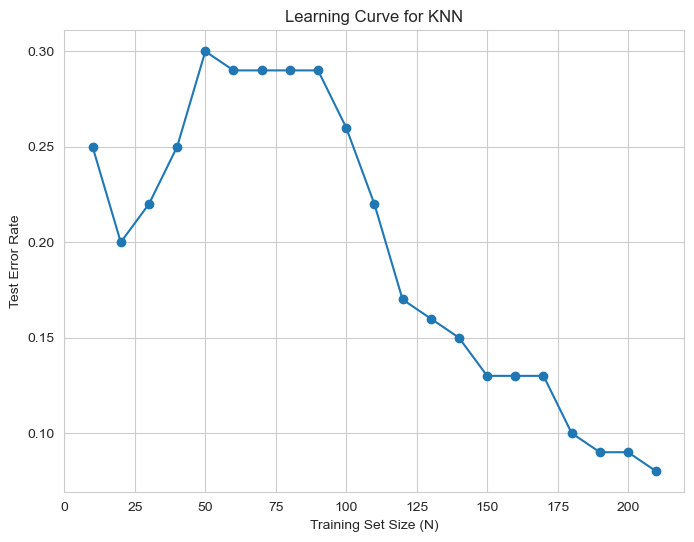

In [11]:
#I have used the weka application to convert the data in the .arff (weka format) to a normal human readable .csv format
#reading the file, here we are reading the column_2C_weka file as it is already classified as Normal and Abnormal
file_path = '../data/vertebral_column_data/column_2C_weka.csv'
#And since we need to consider the first line of the file as the header we are using header = 0
#loading the data into a dataframe
df = pd.read_csv(file_path,header=0)
# Encode the 'class' column that contains the 'Normal' and 'Abnormal' strings to numerical values
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])
class_mapping = {1: 'AB', 0: 'NO'}
df['class'] = df['class'].map(class_mapping)
df['class'] = label_encoder.fit_transform(df['class'])
print(df[df['class'] == 0].shape)
print(df[df['class'] == 1].shape)

#printing the dataframe
# print(df)

# Define a range of training set sizes (N) and step size for k values to split the data sets
training_set_sizes = list(range(10, 211, 10))
k_step = 5

# print(training_set_sizes)
# Initialize lists to store test error rates
test_error_rates = []

# Loop through different training set sizes (N)
for N in training_set_sizes:
    # Select the first ⌊N/3⌋ rows of Class 0 and N - ⌊N/3⌋ rows of Class 1
    df0 = df[df['class'] == 0].head(N // 3)#:]
    df1 = df[df['class'] == 1].head(N - (N // 3))
    
    # Combine the subsets to create the training set
    training_set = pd.concat([df0, df1])
    
    # Split the training set into features (X_train) and the target (y_train)
    training_set_features = training_set.drop('class', axis=1)
    training_set_target = training_set['class']
    
    #repeat the above steps for test_data data frame as well
    test_data_features = test_data.drop('class', axis = 1)
    test_data_target = test_data['class']
    
    # Initialize variables to store the best k and corresponding accuracy
    best_k = None
    best_accuracy = 0
    
    # Loop through different values of k
    for k in range(1, N, k_step):
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(training_set_features, training_set_target)
        
        # Predict on the test data
        y_pred = knn.predict(test_data_features.values)
        
        # Calculate accuracy
        accuracy = accuracy_score(test_data_target, y_pred)
        
        # Update best k and accuracy if needed
        if accuracy > best_accuracy:
            best_k = k
            best_accuracy = accuracy
    
    # Use the best k to train the final KNN model on the entire training set
    knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
    knn.fit(training_set_features, training_set_target)
    
    # Predict on the test data
    y_pred = knn.predict(test_data_features.values)
    
    # Calculate the test error rate
    test_error_rate = 1 - accuracy_score(test_data_target, y_pred)
    
    # Append to the test error rates list
    test_error_rates.append(test_error_rate)

# Plot the Learning Curve
plt.figure(figsize=(8, 6))
plt.plot(training_set_sizes, test_error_rates, marker='o')
plt.xlabel('Training Set Size (N)')
plt.ylabel('Test Error Rate')
plt.title('Learning Curve for KNN')
plt.grid(True)
plt.show()

# Solving 1.(d).(i).(A)
### Replace the Euclidean metric with the following metrics5 and test them. Sum- marize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1,6,11,...,196}.

In [12]:
summarize_dict = {}

(210, 7)
(100, 7)
      k  Test Error Rate
0     1             0.12
1     6             0.11
2    11             0.11
3    16             0.12
4    21             0.12
5    26             0.11
6    31             0.12
7    36             0.13
8    41             0.13
9    46             0.13
10   51             0.14
11   56             0.13
12   61             0.15
13   66             0.15
14   71             0.14
15   76             0.14
16   81             0.16
17   86             0.15
18   91             0.20
19   96             0.20
20  101             0.22
21  106             0.21
22  111             0.23
23  116             0.21
24  121             0.22
25  126             0.24
26  131             0.28
27  136             0.28
28  141             0.30
29  146             0.30
30  151             0.30
31  156             0.30
32  161             0.30
33  166             0.30
34  171             0.30
35  176             0.30
36  181             0.30
37  186             0.30
38  191

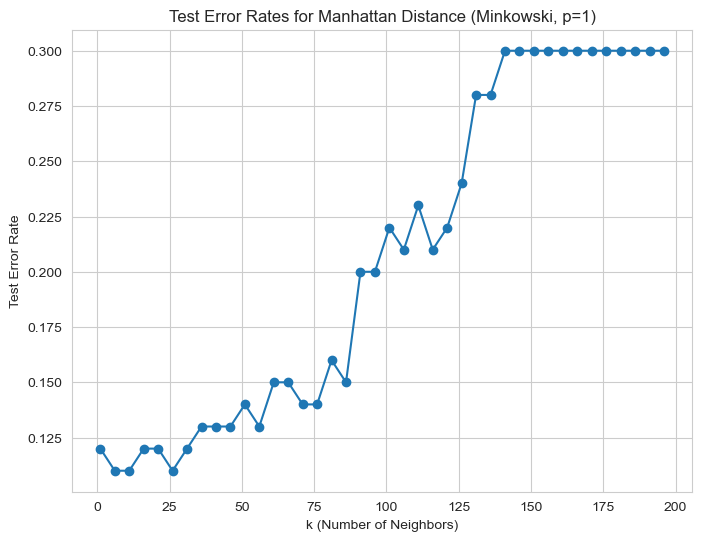


Training Error: 0.13809523809523805

Best k: 6

Best Accuracy: 0.89

Best Error Rate: 0.11


In [13]:
print(train_data.shape)
print(test_data.shape)

# Define a range of k values (1, 6, 11, ..., 196)
k_values = list(range(1, 197, 5))

# Initialize lists to store test error rates
test_errors = []

# Initialize variables to store the best k and corresponding accuracy
best_k = None
best_accuracy = 0

# Loop through different k values
for k in k_values:
    # Train a KNN classifier with Manhattan distance (p=1)
    knn = KNeighborsClassifier(n_neighbors=k, p=1, metric='manhattan') # this is the method that is used for using the parameter manhattan distance = 1
    knn.fit(train_data_features, train_data_target)

    # Predict on the test data
    model_pred = knn.predict(test_data_features.values)

    # Calculate accuracy
    accuracy = accuracy_score(test_data_target, model_pred)

    # Update best k and accuracy if needed
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

    # Calculate and store the test error rate for Manhattan distance (p=1)
    test_error = 1 - accuracy
    test_errors.append(test_error)

# Create a table to summarize the test errors
summary_table = pd.DataFrame({
    'k': k_values,
    'Test Error Rate': test_errors
})

print(summary_table)

# Plot the test error rates for different k values
plt.figure(figsize=(8, 6))
plt.plot(k_values, test_errors, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Test Error Rate')
plt.title('Test Error Rates for Manhattan Distance (Minkowski, p=1)')
plt.grid(True)
plt.show()

# Train a KNN classifier with Manhattan distance (p=1)
knn = KNeighborsClassifier(n_neighbors=best_k, p=1, metric='manhattan') # this is the method that is used for using the parameter manhattan distance = 1
knn.fit(train_data_features, train_data_target)
#check accuracy of our model on the test data
train_error = 1-knn.score(train_data_features, train_data_target)
print("\nTraining Error:",train_error)

print(f"\nBest k: {best_k}")
print(f"\nBest Accuracy: {best_accuracy:.2f}")
print(f"\nBest Error Rate: {1-best_accuracy:.2f}")

summarize_dict['manhattan_least_test_error'] = 1-best_accuracy

# Solving 1.(d).(i).(B)
### Replace the Euclidean metric with the following metrics5 and test them. Sum- marize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1,6,11,...,196}. i. Minkowski Distance with log10(p) ∈ {0.1,0.2,0.3,...,1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

(210, 7)
(100, 7)
   log10(p)  Test Error Rate
0       0.1             0.09
1       0.2             0.09
2       0.3             0.08
3       0.4             0.08
4       0.5             0.08
5       0.6             0.06
6       0.7             0.07
7       0.8             0.08
8       0.9             0.09
9       1.0             0.09


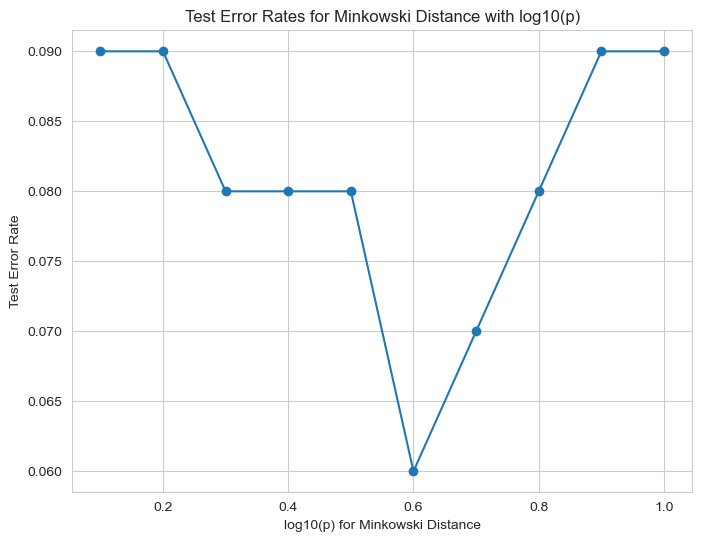


Training Error: 0.1523809523809524
Best log10(p) Value: 0.60


In [14]:
#checking if the data is in the proper order from the train and test data frames that we have constructed
print(train_data.shape)
print(test_data.shape)

# Define a range of log10(p) values (0.1, 0.2, 0.3, ..., 1)
log10_p_values = np.arange(0.1, 1.1, 0.1)

# Initialize lists to store test error rates
test_errors = []

# Initialize variables to store the best log10(p) and corresponding accuracy
best_log10_p = None
best_accuracy = 0

# Initialize best k for Manhattan distance from the precious cell/computation
best_manhattan_k = best_k

# Loop through different log10(p) values
for log10_p in log10_p_values:
    # Calculate p from log10(p)
    p = 10 ** log10_p
    # Train a KNN classifier with Minkowski distance (p)
    knn = KNeighborsClassifier(n_neighbors=best_manhattan_k, p=p, metric = 'minkowski')
    knn.fit(train_data_features, train_data_target)

    # Predict on the test data
    model_pred = knn.predict(test_data_features)

    # Calculate accuracy
    accuracy = accuracy_score(test_data_target, model_pred)

    # Update best k and accuracy if needed
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_log10_p = log10_p

    # Calculate the test error rate for Minkowski distance with log10(p)
    test_error = 1 - accuracy
    test_errors.append(test_error)

# Create a table to summarize the test errors
summary_table = pd.DataFrame({
    'log10(p)': log10_p_values,
    'Test Error Rate': test_errors
})

print(summary_table)

# Plot the test error rates for different log10(p) values
plt.figure(figsize=(8, 6))
plt.plot(log10_p_values, test_errors, marker='o')
plt.xlabel('log10(p) for Minkowski Distance')
plt.ylabel('Test Error Rate')
plt.title('Test Error Rates for Minkowski Distance with log10(p)')
plt.grid(True)
plt.show()

knn = KNeighborsClassifier(n_neighbors=best_manhattan_k, p=10 ** best_log10_p, metric = 'minkowski')
knn.fit(train_data_features, train_data_target)
#check accuracy of our model on the test data
train_error = 1-knn.score(train_data_features, train_data_target)
print("\nTraining Error:",train_error)

print(f"Best log10(p) Value: {best_log10_p:.2f}")

summarize_dict['minkowski_least_test_error'] = summary_table['Test Error Rate'].min()

# Solving 1.(d).(i).(C)
### Replace the Euclidean metric with the following metrics5 and test them. Sum- marize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1,6,11,...,196}with p, which becomes Chebyshev Distance with p → ∞

(210, 7)
(100, 7)
      k  Test Error Rate
0     1             0.13
1     6             0.10
2    11             0.12
3    16             0.08
4    21             0.11
5    26             0.12
6    31             0.12
7    36             0.10
8    41             0.13
9    46             0.12
10   51             0.12
11   56             0.12
12   61             0.14
13   66             0.13
14   71             0.14
15   76             0.11
16   81             0.14
17   86             0.12
18   91             0.15
19   96             0.14
20  101             0.19
21  106             0.18
22  111             0.18
23  116             0.19
24  121             0.21
25  126             0.21
26  131             0.25
27  136             0.28
28  141             0.30
29  146             0.30
30  151             0.30
31  156             0.30
32  161             0.30
33  166             0.30
34  171             0.30
35  176             0.30
36  181             0.30
37  186             0.30
38  191

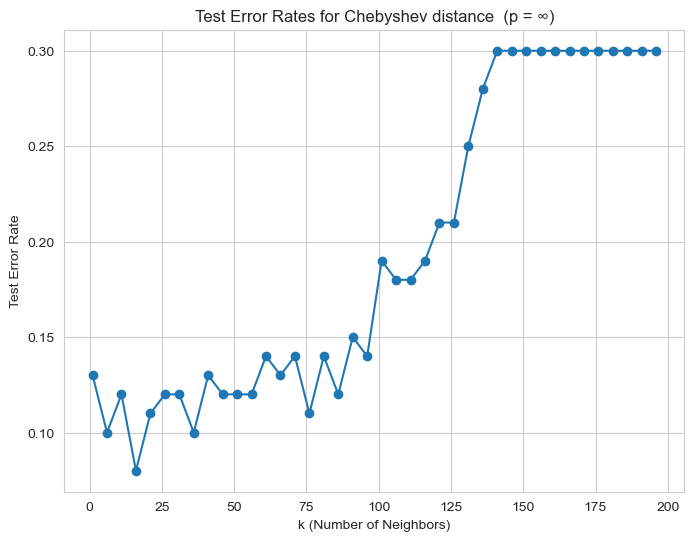


Training Error: 0.1523809523809524

Best k: 16

Best Accuracy: 0.92

Best Error Rate: 0.08


In [15]:
print(train_data.shape)
print(test_data.shape)

# Define a range of k values (1, 6, 11, ..., 196)
k_values = list(range(1, 197, 5))

# Initialize lists to store test error rates
test_errors = []

# Initialize variables to store the best k and corresponding accuracy
best_k = None
best_accuracy = 0

# Loop through different k values
for k in k_values:
    # Train a KNN classifier with chebyshev distance (p = ∞)
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev') # this is the method that is used for using the parameter chebyshev distance (p = ∞)
    knn.fit(train_data_features, train_data_target)

    # Predict on the test data
    model_pred = knn.predict(test_data_features.values)

    # Calculate accuracy
    accuracy = accuracy_score(test_data_target, model_pred)

    # Update best k and accuracy if needed
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

    # Calculate and store the test error rate for Manhattan distance (p=1)
    test_error = 1 - accuracy
    test_errors.append(test_error)

# Create a table to summarize the test errors
summary_table = pd.DataFrame({
    'k': k_values,
    'Test Error Rate': test_errors
})

print(summary_table)

# Plot the test error rates for different k values
plt.figure(figsize=(8, 6))
plt.plot(k_values, test_errors, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Test Error Rate')
plt.title('Test Error Rates for Chebyshev distance  (p = ∞)')
plt.grid(True)
plt.show()

knn = KNeighborsClassifier(n_neighbors=best_k, metric='chebyshev') # this is the method that is used for using the parameter chebyshev distance (p = ∞)
knn.fit(train_data_features, train_data_target)
#check accuracy of our model on the test data
train_error = 1-knn.score(train_data_features, train_data_target)
print("\nTraining Error:",train_error)

print(f"\nBest k: {best_k}")
print(f"\nBest Accuracy: {best_accuracy:.2f}")
print(f"\nBest Error Rate: {1-best_accuracy:.2f}")

summarize_dict['chebyshev_least_test_error'] = 1-best_accuracy

# Solving 1.(d).(ii)
### Replace the Euclidean metric with the following metrics5 and test them. Sum- marize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1,6,11,...,196}with p, which becomes Mahalanobis Distance

(210, 7)
(100, 7)
      k  Test Error Rate
0     1             0.12
1     6             0.08
2    11             0.09
3    16             0.08
4    21             0.10
5    26             0.09
6    31             0.12
7    36             0.10
8    41             0.13
9    46             0.11
10   51             0.11
11   56             0.09
12   61             0.16
13   66             0.12
14   71             0.12
15   76             0.09
16   81             0.11
17   86             0.10
18   91             0.15
19   96             0.09
20  101             0.16
21  106             0.15
22  111             0.19
23  116             0.08
24  121             0.12
25  126             0.10
26  131             0.21
27  136             0.30
28  141             0.30
29  146             0.30
30  151             0.30
31  156             0.30
32  161             0.30
33  166             0.30
34  171             0.30
35  176             0.30
36  181             0.30
37  186             0.30
38  191

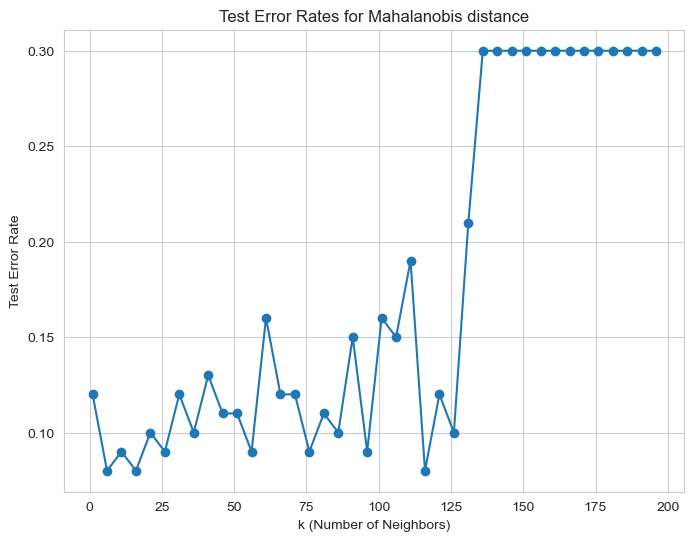


Training Error: 0.13809523809523805

Best k: 6

Best Accuracy: 0.92

Best Error Rate: 0.08


In [16]:
print(train_data.shape)
print(test_data.shape)

# Define a range of k values (1, 6, 11, ..., 196)
k_values = list(range(1, 197, 5))

# Initialize lists to store test error rates
test_errors = []

# Initialize variables to store the best k and corresponding accuracy
best_k = None
best_accuracy = 0

#define the training data co-variance
train_data_features_cov = np.cov(train_data_features, rowvar=False)

# Loop through different k values
for k in k_values:
    # Train a KNN classifier with mahalanobis distance
    # this is the method that is used for using the parameter mahalanobis distance
    knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI': train_data_features_cov})
    knn.fit(train_data_features, train_data_target)

    # Predict on the test data
    model_pred = knn.predict(test_data_features.values)

    # Calculate accuracy
    accuracy = accuracy_score(test_data_target, model_pred)

    # Update best k and accuracy if needed
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

    # Calculate and store the test error rate for Manhattan distance (p=1)
    test_error = 1 - accuracy
    test_errors.append(test_error)

# Create a table to summarize the test errors
summary_table = pd.DataFrame({
    'k': k_values,
    'Test Error Rate': test_errors
})

print(summary_table)

# Plot the test error rates for different k values
plt.figure(figsize=(8, 6))
plt.plot(k_values, test_errors, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Test Error Rate')
plt.title('Test Error Rates for Mahalanobis distance')
plt.grid(True)
plt.show()

knn = KNeighborsClassifier(n_neighbors=best_k, metric='mahalanobis', metric_params={'VI': train_data_features_cov})
knn.fit(train_data_features, train_data_target)
#check accuracy of our model on the test data
train_error = 1-knn.score(train_data_features, train_data_target)
print("\nTraining Error:",train_error)

print(f"\nBest k: {best_k}")
print(f"\nBest Accuracy: {best_accuracy:.2f}")
print(f"\nBest Error Rate: {1-best_accuracy:.2f}")

summarize_dict['mahalanobis_least_test_error'] = 1-best_accuracy

### Summary of Test Errors

In [17]:
for item in summarize_dict:
    print("\n" + item + " : " + str(summarize_dict[item]))


manhattan_least_test_error : 0.10999999999999999

minkowski_least_test_error : 0.06000000000000005

chebyshev_least_test_error : 0.07999999999999996

mahalanobis_least_test_error : 0.07999999999999996


# Solving 1.(e)
### The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16,...,196}

(210, 7)
(100, 7)
      k  Test Error Rate
0     1             0.13
1     6             0.10
2    11             0.12
3    16             0.11
4    21             0.11
5    26             0.11
6    31             0.11
7    36             0.11
8    41             0.11
9    46             0.11
10   51             0.11
11   56             0.11
12   61             0.11
13   66             0.11
14   71             0.11
15   76             0.12
16   81             0.13
17   86             0.13
18   91             0.14
19   96             0.14
20  101             0.12
21  106             0.14
22  111             0.14
23  116             0.13
24  121             0.13
25  126             0.13
26  131             0.14
27  136             0.14
28  141             0.17
29  146             0.19
30  151             0.19
31  156             0.20
32  161             0.23
33  166             0.25
34  171             0.27
35  176             0.27
36  181             0.27
37  186             0.27
38  191

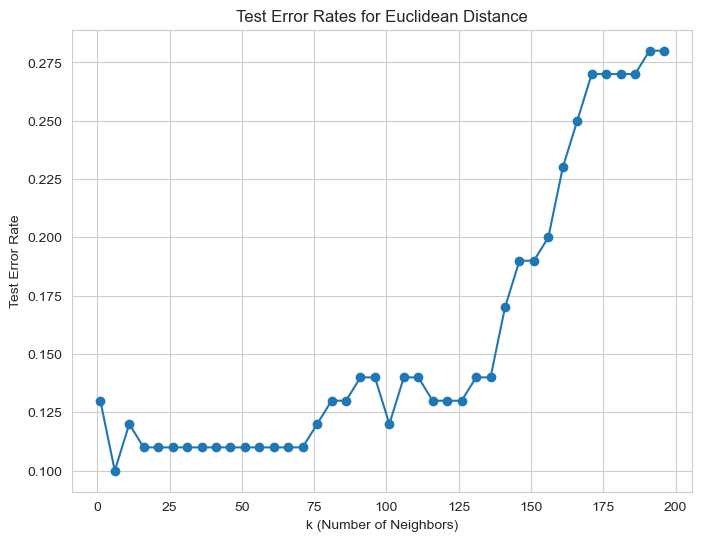


Training Error: 0.0

Best k: 6

Best Accuracy: 0.90

Best Error Rate: 0.10


In [18]:
print(train_data.shape)
print(test_data.shape)

# Define a range of k values (1, 6, 11, ..., 196)
k_values = list(range(1, 197, 5))

# Initialize lists to store test error rates
test_errors = []

# Initialize variables to store the best k and corresponding accuracy
best_k = None
best_accuracy = 0

# Loop through different k values
for k in k_values:
    # Train a KNN classifier with euclidean distance
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='distance')
    knn.fit(train_data_features, train_data_target)

    # Predict on the test data
    model_pred = knn.predict(test_data_features.values)

    # Calculate accuracy
    accuracy = accuracy_score(test_data_target, model_pred)

    # Update best k and accuracy if needed
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

    # Calculate and store the test error rate for euclidean distance
    test_error = 1 - accuracy
    test_errors.append(test_error)

# Create a table to summarize the test errors
summary_table = pd.DataFrame({
    'k': k_values,
    'Test Error Rate': test_errors
})

print(summary_table)

# Plot the test error rates for different k values
plt.figure(figsize=(8, 6))
plt.plot(k_values, test_errors, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Test Error Rate')
plt.title('Test Error Rates for Euclidean Distance')
plt.grid(True)
plt.show()

knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean', weights='distance')
knn.fit(train_data_features, train_data_target)
#check accuracy of our model on the test data
train_error = 1-knn.score(train_data_features, train_data_target)
print("\nTraining Error:",train_error)

print(f"\nBest k: {best_k}")
print(f"\nBest Accuracy: {best_accuracy:.2f}")
print(f"\nBest Error Rate: {1-best_accuracy:.2f}")

(210, 7)
(100, 7)
      k  Test Error Rate
0     1             0.12
1     6             0.11
2    11             0.11
3    16             0.12
4    21             0.11
5    26             0.10
6    31             0.11
7    36             0.11
8    41             0.11
9    46             0.11
10   51             0.12
11   56             0.12
12   61             0.13
13   66             0.13
14   71             0.11
15   76             0.12
16   81             0.14
17   86             0.14
18   91             0.13
19   96             0.13
20  101             0.15
21  106             0.15
22  111             0.15
23  116             0.15
24  121             0.15
25  126             0.15
26  131             0.15
27  136             0.16
28  141             0.17
29  146             0.18
30  151             0.19
31  156             0.21
32  161             0.24
33  166             0.25
34  171             0.27
35  176             0.27
36  181             0.27
37  186             0.27
38  191

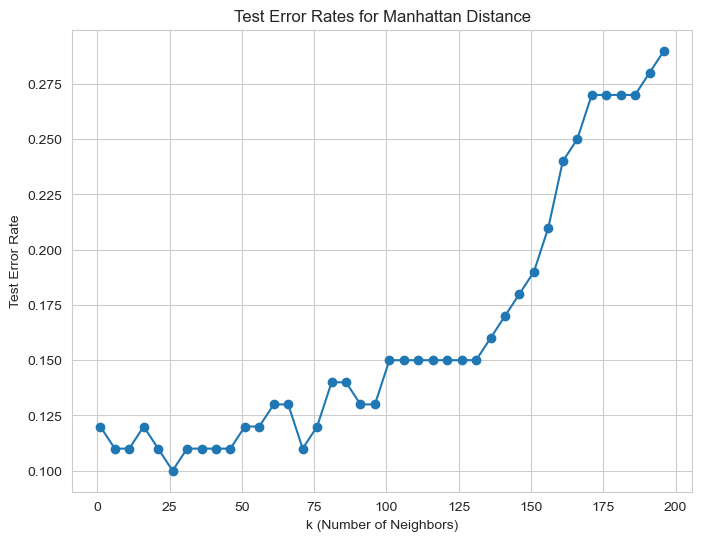


Training Error: 0.0

Best k: 26

Best Accuracy: 0.90

Best Error Rate: 0.10


In [19]:
print(train_data.shape)
print(test_data.shape)

# Define a range of k values (1, 6, 11, ..., 196)
k_values = list(range(1, 197, 5))

# Initialize lists to store test error rates
test_errors = []

# Initialize variables to store the best k and corresponding accuracy
best_k = None
best_accuracy = 0

# Loop through different k values
for k in k_values:
    # Train a KNN classifier with Manhattan distance (p=1)
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan', weights='distance') # this is the method that is used for using the parameter manhattan distance = 1
    knn.fit(train_data_features, train_data_target)

    # Predict on the test data
    model_pred = knn.predict(test_data_features.values)

    # Calculate accuracy
    accuracy = accuracy_score(test_data_target, model_pred)

    # Update best k and accuracy if needed
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

    # Calculate and store the test error rate for Manhattan distance (p=1)
    test_error = 1 - accuracy
    test_errors.append(test_error)

# Create a table to summarize the test errors
summary_table = pd.DataFrame({
    'k': k_values,
    'Test Error Rate': test_errors
})

print(summary_table)

# Plot the test error rates for different k values
plt.figure(figsize=(8, 6))
plt.plot(k_values, test_errors, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Test Error Rate')
plt.title('Test Error Rates for Manhattan Distance')
plt.grid(True)
plt.show()

knn = KNeighborsClassifier(n_neighbors=best_k, metric='manhattan', weights='distance') # this is the method that is used for using the parameter manhattan distance = 1
knn.fit(train_data_features, train_data_target)
#check accuracy of our model on the test data
train_error = 1-knn.score(train_data_features, train_data_target)
print("\nTraining Error:",train_error)

print(f"\nBest k: {best_k}")
print(f"\nBest Accuracy: {best_accuracy:.2f}")
print(f"\nBest Error Rate: {1-best_accuracy:.2f}")

(210, 7)
(100, 7)
      k  Test Error Rate
0     1             0.13
1     6             0.13
2    11             0.12
3    16             0.11
4    21             0.12
5    26             0.12
6    31             0.11
7    36             0.11
8    41             0.11
9    46             0.12
10   51             0.12
11   56             0.12
12   61             0.11
13   66             0.13
14   71             0.12
15   76             0.12
16   81             0.12
17   86             0.14
18   91             0.13
19   96             0.14
20  101             0.14
21  106             0.14
22  111             0.14
23  116             0.14
24  121             0.15
25  126             0.14
26  131             0.16
27  136             0.16
28  141             0.18
29  146             0.19
30  151             0.21
31  156             0.21
32  161             0.23
33  166             0.26
34  171             0.26
35  176             0.26
36  181             0.27
37  186             0.27
38  191

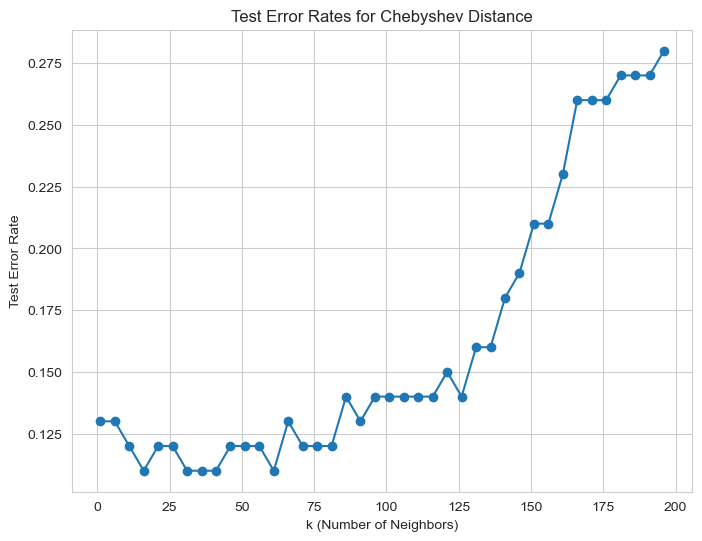


Training Error: 0.0

Best k: 16

Best Accuracy: 0.89

Best Error Rate: 0.11


In [20]:
print(train_data.shape)
print(test_data.shape)

# Define a range of k values (1, 6, 11, ..., 196)
k_values = list(range(1, 197, 5))

# Initialize lists to store test error rates
test_errors = []

# Initialize variables to store the best k and corresponding accuracy
best_k = None
best_accuracy = 0

# Loop through different k values
for k in k_values:
    # Train a KNN classifier with chebyshev distance
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev', weights='distance') # this is the method that is used for using the parameter manhattan distance = 1
    knn.fit(train_data_features, train_data_target)

    # Predict on the test data
    model_pred = knn.predict(test_data_features.values)

    # Calculate accuracy
    accuracy = accuracy_score(test_data_target, model_pred)

    # Update best k and accuracy if needed
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

    # Calculate and store the test error rate for chebyshev distance (p=1)
    test_error = 1 - accuracy
    test_errors.append(test_error)

# Create a table to summarize the test errors
summary_table = pd.DataFrame({
    'k': k_values,
    'Test Error Rate': test_errors
})

print(summary_table)

# Plot the test error rates for different k values
plt.figure(figsize=(8, 6))
plt.plot(k_values, test_errors, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Test Error Rate')
plt.title('Test Error Rates for Chebyshev Distance')
plt.grid(True)
plt.show()

knn = KNeighborsClassifier(n_neighbors=best_k, metric='chebyshev', weights='distance') # this is the method that is used for using the parameter manhattan distance = 1
knn.fit(train_data_features, train_data_target)
#check accuracy of our model on the test data
train_error = 1-knn.score(train_data_features, train_data_target)
print("\nTraining Error:",train_error)

print(f"\nBest k: {best_k}")
print(f"\nBest Accuracy: {best_accuracy:.2f}")
print(f"\nBest Error Rate: {1-best_accuracy:.2f}")

# Solving 1.(f)
### What is the lowest training error rate you achieved in this homework?

## Answer
### The lowest training error rate I achieved in this homework is <i><u> 0.00 </u></i>
### The lowest test error rate I achieved in this homework is <i><u> 0.06 </u></i>